<a href="https://colab.research.google.com/github/laussin86/laussin86/blob/main/Loan_Default_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
#1. Check the datatypes of the attributes.
df = pd.read_csv('accepted_2007_to_2018Q4.csv',
                 usecols=['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
                          'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
                          'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',"addr_state",
                          'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
                          'revol_util', 'total_acc', 'initial_list_status', 'application_type',
                          'mort_acc', 'pub_rec_bankruptcies'])
print(df.dtypes)

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
addr_state               object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
dtype: object


In [84]:
#2. Are there any missing values in the dataset?
df.isnull().sum()

loan_amnt                   23
term                        23
int_rate                    23
installment                 23
grade                       23
sub_grade                   23
emp_title               126762
emp_length              111022
home_ownership              23
annual_inc                  27
verification_status         23
issue_d                     23
loan_status                 23
purpose                     23
title                    17910
addr_state                  23
dti                       1462
earliest_cr_line            52
open_acc                    52
pub_rec                     52
revol_bal                   23
revol_util                1327
total_acc                   52
initial_list_status         24
application_type            24
mort_acc                 42559
pub_rec_bankruptcies      1389
dtype: int64

In [85]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,1672884.0,15219.488829,9244.219390,500.00,8000.00,13000.00,20000.00,4.000000e+04
int_rate,1672884.0,12.886498,4.805140,5.31,9.17,12.49,15.61,3.099000e+01
installment,1672884.0,447.070904,266.483890,14.01,253.28,378.59,595.31,1.719830e+03
annual_inc,1672880.0,78156.706065,114748.617574,0.00,46000.00,65000.00,93632.50,1.100000e+08
dti,1671445.0,19.042570,14.697972,-1.00,11.95,17.96,24.74,9.990000e+02
open_acc,1672855.0,11.684076,5.711543,0.00,8.00,11.00,15.00,1.010000e+02
pub_rec,1672855.0,0.197657,0.566616,0.00,0.00,0.00,0.00,8.600000e+01
revol_bal,1672884.0,16816.087074,23294.003743,0.00,5885.00,11330.00,20426.00,2.904836e+06
revol_util,1671580.0,49.869809,24.758225,0.00,31.00,49.60,68.90,8.923000e+02
total_acc,1672855.0,24.264887,12.096815,1.00,15.00,22.00,31.00,1.760000e+02


In [86]:
#3. What is the correlation between the attributes other than loan_status?
dfq = df.loc[:, df.columns !='loan_status']
dfq.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.085304,0.944114,0.193773,0.043971,0.182345,-0.065486,0.319594,0.102833,0.197067,0.218719,-0.088939
int_rate,0.085304,1.000000,0.108077,-0.051181,0.129960,-0.009563,0.057663,-0.032047,0.252449,-0.041172,-0.088633,0.060953
installment,0.944114,0.108077,1.000000,0.187567,0.045526,0.171568,-0.052475,0.305571,0.121241,0.175497,0.184288,-0.079313
annual_inc,0.193773,-0.051181,0.187567,1.000000,-0.082453,0.092582,-0.004785,0.186937,0.029496,0.112545,0.132687,-0.027357
dti,0.043971,0.129960,0.045526,-0.082453,1.000000,0.183059,-0.026429,0.101011,0.116100,0.144657,-0.008836,-0.012735
open_acc,0.182345,-0.009563,0.171568,0.092582,0.183059,1.000000,-0.015300,0.238335,-0.129500,0.720258,0.134421,-0.015797
pub_rec,-0.065486,0.057663,-0.052475,-0.004785,-0.026429,-0.015300,1.000000,-0.089039,-0.049823,0.010367,-0.005731,0.663517
revol_bal,0.319594,-0.032047,0.305571,0.186937,0.101011,0.238335,-0.089039,1.000000,0.250617,0.203854,0.214212,-0.111311
revol_util,0.102833,0.252449,0.121241,0.029496,0.116100,-0.129500,-0.049823,0.250617,1.000000,-0.091271,0.039306,-0.075772
total_acc,0.197067,-0.041172,0.175497,0.112545,0.144657,0.720258,0.010367,0.203854,-0.091271,1.000000,0.365215,0.030844


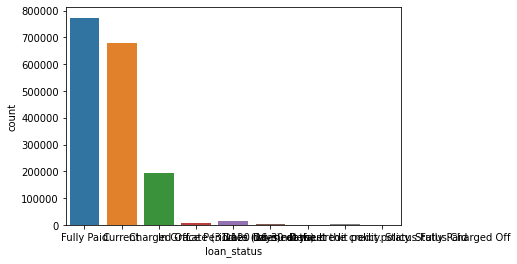

In [87]:
#4. Graph the frequency distribution of all the selected attributes.
ax = sns.countplot(x="loan_status",data=df)


(array([250244., 310604., 380595., 297570., 204456., 118058.,  52199.,
         34053.,  14313.,  10792.]),
 array([ 5.31 ,  7.878, 10.446, 13.014, 15.582, 18.15 , 20.718, 23.286,
        25.854, 28.422, 30.99 ]),
 <a list of 10 Patch objects>)

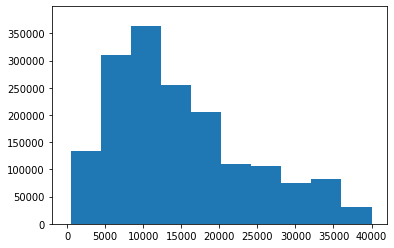

In [92]:
plt.hist(df['loan_amnt'])

(array([2.32496e+05, 5.33266e+05, 3.83595e+05, 2.43584e+05, 1.39380e+05,
        7.21040e+04, 4.51730e+04, 2.19620e+04, 1.25400e+03, 7.00000e+01]),
 array([  14.01 ,  184.592,  355.174,  525.756,  696.338,  866.92 ,
        1037.502, 1208.084, 1378.666, 1549.248, 1719.83 ]),
 <a list of 10 Patch objects>)

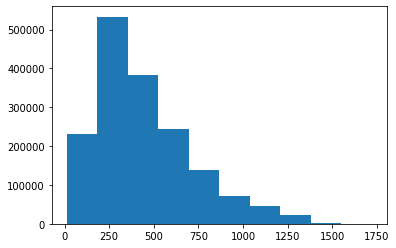

In [94]:
plt.hist(df['installment'])

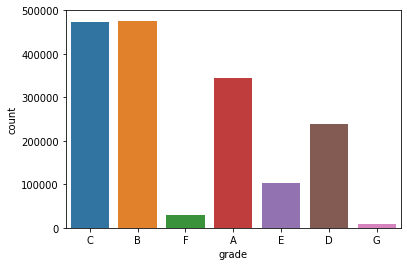

In [95]:
ax = sns.countplot(x="grade",data=df)

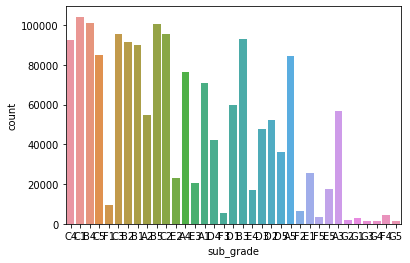

In [96]:
ax = sns.countplot(x="sub_grade",data=df)

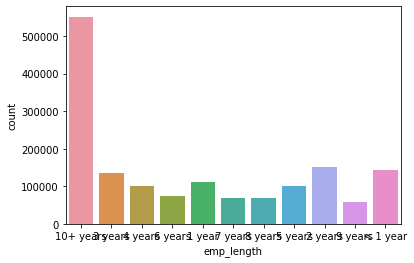

In [98]:
ax = sns.countplot(x="emp_length",data=df)

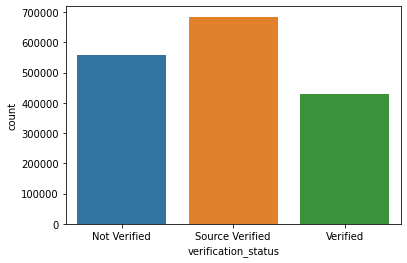

In [100]:
ax = sns.countplot(x="verification_status",data=df)

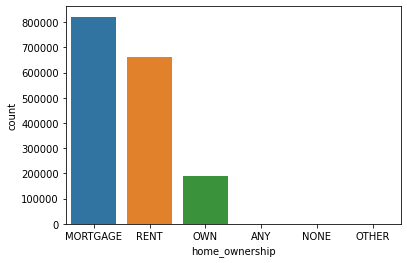

In [102]:
ax = sns.countplot(x="home_ownership",data=df)

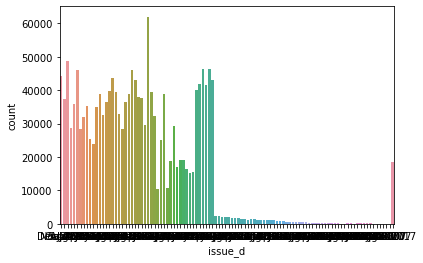

In [107]:
ax = sns.countplot(x="issue_d",data=df)

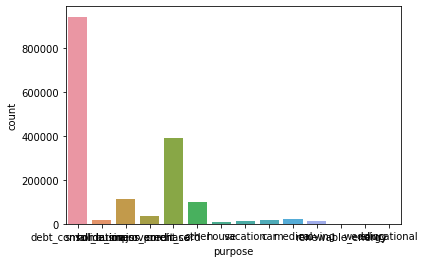

In [108]:
ax = sns.countplot(x="purpose",data=df)

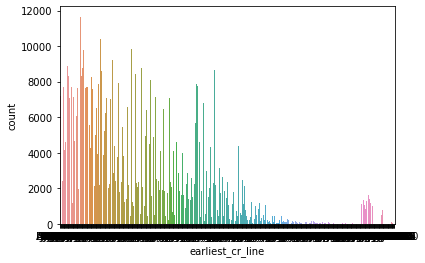

In [9]:
ax = sns.countplot(x="earliest_cr_line",data=df)

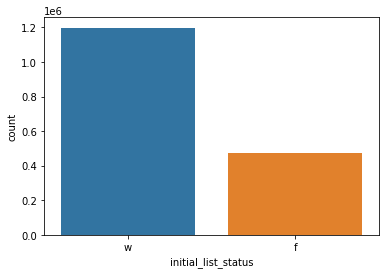

In [15]:
ax = sns.countplot(x="initial_list_status",data=df)

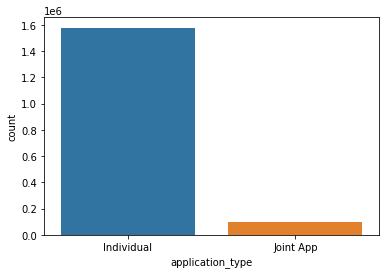

In [17]:
ax = sns.countplot(x="application_type",data=df)

(array([1.625597e+06, 4.597000e+03, 1.310000e+02, 1.600000e+01,
        2.000000e+00, 3.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 2.000000e+00]),
 array([ 0. ,  9.4, 18.8, 28.2, 37.6, 47. , 56.4, 65.8, 75.2, 84.6, 94. ]),
 <a list of 10 Patch objects>)

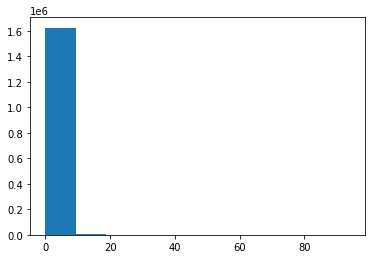

In [18]:
plt.hist(df['mort_acc'])

(array([1.661384e+06, 7.925000e+03, 1.599000e+03, 3.960000e+02,
        1.400000e+02, 6.200000e+01, 7.000000e+00, 3.000000e+00,
        0.000000e+00, 2.000000e+00]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

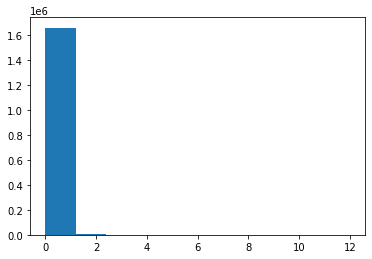

In [19]:
plt.hist(df['pub_rec_bankruptcies'])

(array([8.17197e+05, 7.30764e+05, 1.09933e+05, 1.30340e+04, 1.59300e+03,
        2.60000e+02, 4.70000e+01, 1.50000e+01, 8.00000e+00, 4.00000e+00]),
 array([  0. ,  10.1,  20.2,  30.3,  40.4,  50.5,  60.6,  70.7,  80.8,
         90.9, 101. ]),
 <a list of 10 Patch objects>)

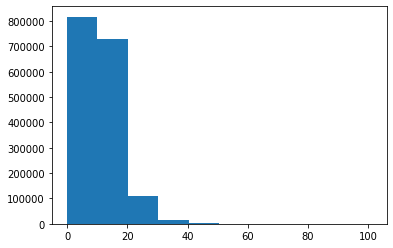

In [10]:
plt.hist(df['open_acc'])

(array([1.672519e+06, 2.960000e+02, 2.400000e+01, 7.000000e+00,
        2.000000e+00, 4.000000e+00, 1.000000e+00, 1.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([ 0. ,  8.6, 17.2, 25.8, 34.4, 43. , 51.6, 60.2, 68.8, 77.4, 86. ]),
 <a list of 10 Patch objects>)

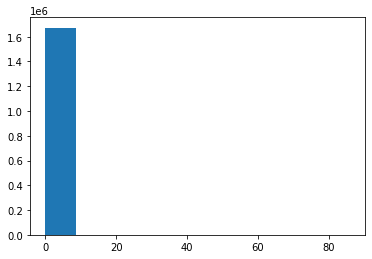

In [11]:
plt.hist(df['pub_rec'])

(array([1.671565e+06, 1.176000e+03, 1.020000e+02, 2.800000e+01,
        5.000000e+00, 3.000000e+00, 2.000000e+00, 0.000000e+00,
        2.000000e+00, 1.000000e+00]),
 array([      0. ,  290483.6,  580967.2,  871450.8, 1161934.4, 1452418. ,
        1742901.6, 2033385.2, 2323868.8, 2614352.4, 2904836. ]),
 <a list of 10 Patch objects>)

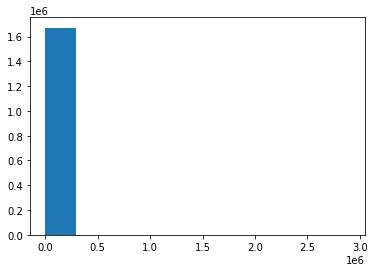

In [12]:
plt.hist(df['revol_bal'])

(array([1.570271e+06, 1.013010e+05, 6.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([  0.  ,  89.23, 178.46, 267.69, 356.92, 446.15, 535.38, 624.61,
        713.84, 803.07, 892.3 ]),
 <a list of 10 Patch objects>)

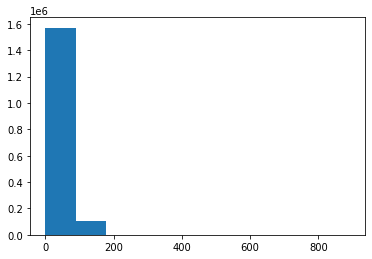

In [13]:
plt.hist(df['revol_util'])

(array([6.00991e+05, 7.98522e+05, 2.35210e+05, 3.30890e+04, 4.23400e+03,
        6.48000e+02, 1.17000e+02, 2.60000e+01, 1.20000e+01, 6.00000e+00]),
 array([  1. ,  18.5,  36. ,  53.5,  71. ,  88.5, 106. , 123.5, 141. ,
        158.5, 176. ]),
 <a list of 10 Patch objects>)

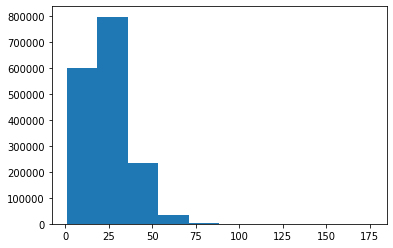

In [14]:
plt.hist(df['total_acc'])

(array([1.669295e+06, 1.453000e+03, 2.920000e+02, 1.210000e+02,
        7.100000e+01, 3.900000e+01, 2.900000e+01, 1.900000e+01,
        1.100000e+01, 1.150000e+02]),
 array([ -1.,  99., 199., 299., 399., 499., 599., 699., 799., 899., 999.]),
 <a list of 10 Patch objects>)

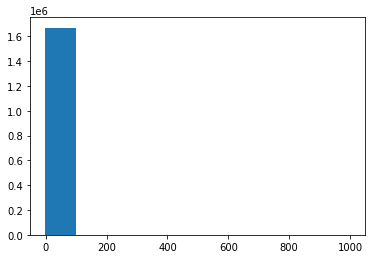

In [8]:
plt.hist(df['dti'])

(array([1.672879e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([0.0e+00, 1.1e+07, 2.2e+07, 3.3e+07, 4.4e+07, 5.5e+07, 6.6e+07,
        7.7e+07, 8.8e+07, 9.9e+07, 1.1e+08]),
 <a list of 10 Patch objects>)

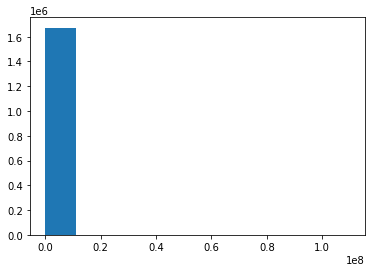

In [103]:
plt.hist(df['annual_inc'])

(array([250244., 310604., 380595., 297570., 204456., 118058.,  52199.,
         34053.,  14313.,  10792.]),
 array([ 5.31 ,  7.878, 10.446, 13.014, 15.582, 18.15 , 20.718, 23.286,
        25.854, 28.422, 30.99 ]),
 <a list of 10 Patch objects>)

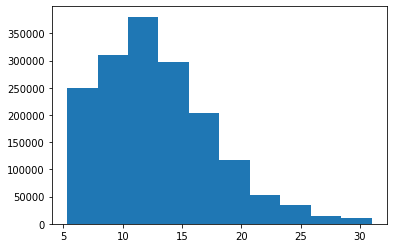

In [104]:
plt.hist(df['int_rate'])

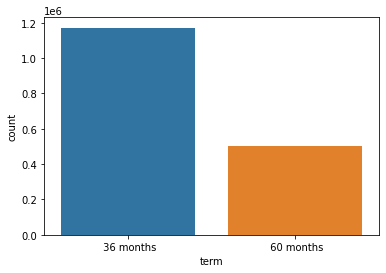

In [91]:
ax = sns.countplot(x="term",data=df)